<a href="https://colab.research.google.com/github/vanviethieuanh/CS114.L21/blob/main/Predict_the_final_score_of_students_IT001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CS114.L21 - MÁY HỌC - MACHINE LEARNING**

**BÀI TẬP COLAB SỐ 03 (17/05/2021)**

**1. YÊU CẦU:**

+ Data discovery

**2. NHÓM THỰC HIỆN**

+ Nguyễn Đại Kỳ - 19521731 - 19521731@gm.uit.edu.vn
+ Văn Viết Hiếu Anh - 19521225 - 19521225@gm.uit.edu.vn
+ Lê Văn Phước - 19522054 - 19522054@gm.uit.edu.vn

**3. LINK GITHUB**

+ Link GitHub bài làm: https://github.com/vanviethieuanh/CS114.L21/blob/main/Predict_the_final_score_of_students_IT001.ipynb

+ Link GitHub dataset: https://drive.google.com/drive/folders/1WHVKhGP-z7mJg8B8HumeRqS10c-RUYhu?usp=sharing

**4. SOURCE CODE**

**4.1. Nguồn tham khảo**

1. Polynomial Regression with Scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. 

**4.2. Code**

**4.2.1. Đọc dữ liệu, phân tích dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/wecode.csv')
df_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/score_training.csv')

In [ ]:
df_x.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [ ]:
df_y.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [ ]:
# Lấy ra những dữ liệu cần thiết
import numpy as np
X = np.array([df_x['user_id'], df_x['problem_id'], df_x['pre_score'],df_x['is_final'], df_x['status']]).T
y_train = np.array([df_y['id'], df_y['CK']]).T

In [ ]:
print('X: \n',X[0:10])
print('y_train:\n',y_train[0:10])

X: 
 [[4 3 10000 1 'SCORE']
 [4 4 10000 1 'SCORE']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 6 10000 1 'SCORE']
 [4 7 10000 1 'SCORE']
 [4 8 10000 1 'SCORE']
 [4 9 10000 1 'SCORE']]
y_train:
 [[22 '8.5']
 [24 '9.5']
 [27 '10']
 [28 '9.5']
 [29 '8.5']
 [30 '9']
 [34 '6.5']
 [35 '4.5']
 [36 '7']
 [37 '7.5']]


In [ ]:
# Lấy ra user_id của học sinh
x_temp = X.T
arr_id = list(set(x_temp[0]))
print('Show id users:\n',arr_id)
print('Tổng số id user:\n',len(arr_id))

# Cleaner code

NameError: ignored

In [ ]:
# Lấy ra dự liệu hoạt động của từng học sinh
arr_students = []
for i in range(len(arr_id)):
  arr_student = []
  for j in range(len(X)):
    if X[j][0] == arr_id[i]:
      arr_student.append(X[j])
  arr_students.append(arr_student)

In [ ]:
# In ra dữ liệu của một id user
print(np.array(arr_students[1]))

[[4 3 10000 1 'SCORE']
 [4 4 10000 1 'SCORE']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 5 0 0 'Compilation Error']
 [4 6 10000 1 'SCORE']
 [4 7 10000 1 'SCORE']
 [4 8 10000 1 'SCORE']
 [4 9 10000 1 'SCORE']
 [4 5 10000 1 'SCORE']
 [4 81 0 1 'SCORE']
 [4 101 10000 1 'SCORE']
 [4 101 10000 0 'SCORE']
 [4 104 10000 1 'SCORE']
 [4 106 10000 1 'SCORE']
 [4 107 10000 1 'SCORE']
 [4 108 10000 1 'SCORE']
 [4 109 10000 1 'SCORE']
 [4 110 10000 1 'SCORE']
 [4 111 10000 1 'SCORE']
 [4 111 10000 0 'SCORE']
 [4 112 10000 0 'SCORE']
 [4 117 10000 1 'SCORE']
 [4 118 0 0 'Compilation Error']
 [4 118 10000 1 'SCORE']
 [4 119 10000 1 'SCORE']
 [4 121 10000 1 'SCORE']
 [4 123 10000 1 'SCORE']
 [4 131 10000 1 'SCORE']
 [4 132 10000 1 'SCORE']
 [4 133 10000 1 'SCORE']
 [4 134 10000 0 'SCORE']
 [4 135 10000 1 'SCORE']
 [4 136 10000 1 'SCORE']
 [4 137 10000 1 'SCORE']
 [4 138 10000 1 'SCORE']
 [4 139 10000 1 'SCORE']
 [4 140 10000 0 'SCORE']
 [4 141 9000

**4.2.2. CÁC ĐẶC TRƯNG CẦN LẤY Ở BỘ DỮ LIỆU CỦA TỪNG HỌC SINH:**
  - Số bài hoàn thành.
  - Số bài nộp trung bình trên mỗi bài làm.
  - Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit.
  - Số lần Compilation Error.
  - Tổng số điểm


In [ ]:
# CÁC ĐẶC TRƯNG CẦN LẤY Ở BỘ DỮ LIỆU CỦA TỪNG HỌC SINH:
def features(arr_student):
  # Tổng số tasks hoàn thành
  sum_tasks = 0

  # Tổng số bài final submissions
  sum_final_submissions = 0

  # Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
  arr_student_temp = np.array(arr_student).T  
  sum_problems_have_submit = len(list(set(arr_student_temp[1])))
  print(sum_problems_have_submit)

  # Tổng số compilation error
  sum_compilation_error = 0

  # Tổng số score
  sum_score = 0

  for i in range(len(arr_student)):
    # Lấy số bài hoàn thành của từng học sinh:
    if arr_student[i][2] == 10000 and arr_student[i][3] == 1:
      sum_tasks += 1

    # Lấy số bài nộp trung bình trên mỗi bài làm:
    if arr_student[i][3] == 1:
      sum_final_submissions += 1

    # Lấy tổng số lần Compilation Error
    if arr_student[i][4] == 'Compilation Error':
      sum_compilation_error += 1

    # Lấy tổng số điểm của từng học sinh:
    if arr_student[i][3] == 1:
      sum_score += arr_student[i][2]
  
  # Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
  if sum_problems_have_submit == 0:
    avg_solved_problem_per_sum_problems_have_submit = 0
  else:
    avg_solved_problem_per_sum_problems_have_submit = round(sum_tasks / sum_problems_have_submit, 4)

  if sum_final_submissions == 0:
    avg_submissions = 0
  else:
    avg_submissions = round(len(arr_student) / sum_final_submissions, 4)

  return sum_tasks, avg_submissions, avg_solved_problem_per_sum_problems_have_submit, sum_compilation_error, sum_score

In [ ]:
# Lấy dữ liệu X (training and testing)
arr_temp_datasets = list()
for i in range(len(arr_students)):
  sum_tasks, avg_submissions, avg_solved_problem_per_sum_problems_have_submit, sum_compilation_error, sum_score = features(np.array(arr_students[i]))
  arr_temp = [arr_id[i], sum_tasks, avg_solved_problem_per_sum_problems_have_submit, avg_submissions, sum_compilation_error, sum_score]
  arr_temp_datasets.append(arr_temp)

In [ ]:
# In ra bộ dataset tạm thời
print(arr_temp_datasets[0:10])

[[1, 1, 0.5, 1.0, 1, 10000], [4, 37, 0.9024, 1.4211, 6, 370000], [5, 3, 0.6, 1.2, 2, 30000], [6, 85, 0.9659, 1.4773, 25, 850000], [7, 0, 0.0, 2.5, 0, 9209], [11, 9, 0.5, 4.1667, 7, 100316], [14, 6, 0.8571, 3.1429, 2, 68000], [15, 45, 0.9, 1.9423, 25, 458666], [20, 12, 1.0, 1.0833, 1, 120000], [24, 72, 0.9231, 2.1299, 33, 750299]]


**4.2.3. Lưu dataset cần training vào file csv**

In [ ]:
# Lưu dataset X vào csv
from pandas import DataFrame
arr_temp = np.array(arr_temp_datasets).T
data_temp = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'avg_solved_problem_per_sum_problems_have_submit':arr_temp[3],
    'sum_compilation_error':arr_temp[4],
    'sum_score':arr_temp[5]
}
df = DataFrame(data_temp, columns= ['user_id', 'sum_tasks', 'avg_submissions', 'avg_solved_problem_per_sum_problems_have_submit', 'sum_compilation_error', 'sum_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_0.csv', index = None, header=True)

In [ ]:
df.head(10)

,user_id,sum_tasks,avg_submissions,avg_solved_problem_per_sum_problems_have_submit,sum_compilation_error,sum_score
0,1.0,1.0,0.5000,1.0000,1.0,10000.0
1,4.0,37.0,0.9024,1.4211,6.0,370000.0
2,5.0,3.0,0.6000,1.2000,2.0,30000.0
3,6.0,85.0,0.9659,1.4773,25.0,850000.0
4,7.0,0.0,0.0000,2.5000,0.0,9209.0
5,11.0,9.0,0.5000,4.1667,7.0,100316.0
6,14.0,6.0,0.8571,3.1429,2.0,68000.0
7,15.0,45.0,0.9000,1.9423,25.0,458666.0
8,20.0,12.0,1.0000,1.0833,1.0,120000.0
9,24.0,72.0,0.9231,2.1299,33.0,750299.0


**4.2.4. Chia bộ data tạm thời thành bộ data training và bộ testing**

In [ ]:
# Lấy dự liệu từ file data_0.csv
import pandas as pd
import numpy as np
df_X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_0.csv')

In [ ]:
df_X.head(10)

,user_id,sum_tasks,avg_submissions,avg_solved_problem_per_sum_problems_have_submit,sum_compilation_error,sum_score
0,1.0,1.0,0.5000,1.0000,1.0,10000.0
1,4.0,37.0,0.9024,1.4211,6.0,370000.0
2,5.0,3.0,0.6000,1.2000,2.0,30000.0
3,6.0,85.0,0.9659,1.4773,25.0,850000.0
4,7.0,0.0,0.0000,2.5000,0.0,9209.0
5,11.0,9.0,0.5000,4.1667,7.0,100316.0
6,14.0,6.0,0.8571,3.1429,2.0,68000.0
7,15.0,45.0,0.9000,1.9423,25.0,458666.0
8,20.0,12.0,1.0000,1.0833,1.0,120000.0
9,24.0,72.0,0.9231,2.1299,33.0,750299.0


In [ ]:
input_X = np.array([df_X['user_id'],df_X['sum_tasks'], df_X['avg_solved_problem_per_sum_problems_have_submit'],df_X['avg_submissions'],df_X['sum_compilation_error'],df_X['sum_score']]).T
print(input_X[0:10])

[[1.00000e+00 1.00000e+00 1.00000e+00 5.00000e-01 1.00000e+00 1.00000e+04]
 [4.00000e+00 3.70000e+01 1.42110e+00 9.02400e-01 6.00000e+00 3.70000e+05]
 [5.00000e+00 3.00000e+00 1.20000e+00 6.00000e-01 2.00000e+00 3.00000e+04]
 [6.00000e+00 8.50000e+01 1.47730e+00 9.65900e-01 2.50000e+01 8.50000e+05]
 [7.00000e+00 0.00000e+00 2.50000e+00 0.00000e+00 0.00000e+00 9.20900e+03]
 [1.10000e+01 9.00000e+00 4.16670e+00 5.00000e-01 7.00000e+00 1.00316e+05]
 [1.40000e+01 6.00000e+00 3.14290e+00 8.57100e-01 2.00000e+00 6.80000e+04]
 [1.50000e+01 4.50000e+01 1.94230e+00 9.00000e-01 2.50000e+01 4.58666e+05]
 [2.00000e+01 1.20000e+01 1.08330e+00 1.00000e+00 1.00000e+00 1.20000e+05]
 [2.40000e+01 7.20000e+01 2.12990e+00 9.23100e-01 3.30000e+01 7.50299e+05]]


In [ ]:
print('y_training: \n',y_train[0:10])
y_train = list(y_train)
n = len(y_train)
i = 0
while(n != i):
  if y_train[i][1] == '\xa0' or y_train[i][0] == 51:
    y_train.pop(i)
    n -= 1
  else:
    i += 1 

y_training: 
 [[22 '8.5']
 [24 '9.5']
 [27 '10']
 [28 '9.5']
 [29 '8.5']
 [30 '9']
 [34 '6.5']
 [35 '4.5']
 [36 '7']
 [37 '7.5']]


In [ ]:

X_training = []
X_testing = []
temp_X = list(input_X)
for i in range(len(y_train)):
  while(len(temp_X)!=0):
    j = 0
    if int(y_train[i][0]) == int(temp_X[j][0]):
      temp = list(temp_X[j])
      temp.extend([y_train[i][1]])
      X_training.append(temp)
      temp_X.pop(j)
      break
    elif int(y_train[i][0]) < int(temp_X[j][0]):
      break
    else:
      X_testing.append(temp_X[j])
      temp_X.pop(j)

In [ ]:
# In ra dự liêu training và dữ liệu predict
print('X_training:\n',np.array(X_training[0:10]))
print('X_testing:\n',np.array(X_testing[0:10]))

X_training:
 [['24.0' '72.0' '2.1299' '0.9231' '33.0' '750299.0' '9.5']
 ['27.0' '3.0' '2.6' '0.6' '0.0' '39000.0' '10']
 ['29.0' '72.0' '2.4875' '0.9' '28.0' '762760.0' '8.5']
 ['34.0' '81.0' '2.5952' '0.9643' '16.0' '822888.0' '6.5']
 ['35.0' '145.0' '1.9669' '0.9864' '51.0' '1477000.0' '4.5']
 ['37.0' '93.0' '3.0588' '0.9118' '62.0' '979712.0' '7.5']
 ['40.0' '207.0' '3.0884' '1.0838' '112.0' '2111388.0' '8']
 ['41.0' '61.0' '1.5493' '0.8592' '5.0' '636888.0' '8']
 ['42.0' '191.0' '1.6701' '1.0552' '34.0' '1925142.0' '7.5']
 ['43.0' '148.0' '2.8176' '1.5102' '118.0' '1541357.0' '6']]
X_testing:
 [[1.00000e+00 1.00000e+00 1.00000e+00 5.00000e-01 1.00000e+00 1.00000e+04]
 [4.00000e+00 3.70000e+01 1.42110e+00 9.02400e-01 6.00000e+00 3.70000e+05]
 [5.00000e+00 3.00000e+00 1.20000e+00 6.00000e-01 2.00000e+00 3.00000e+04]
 [6.00000e+00 8.50000e+01 1.47730e+00 9.65900e-01 2.50000e+01 8.50000e+05]
 [7.00000e+00 0.00000e+00 2.50000e+00 0.00000e+00 0.00000e+00 9.20900e+03]
 [1.10000e+01 9.000

In [ ]:
# Lưu dataset training sets vào csv
from pandas import DataFrame
arr_temp = np.array(X_training).T
data_training_set = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'avg_solved_problem_per_sum_problems_have_submit':arr_temp[3],
    'sum_compilation_error':arr_temp[4],
    'sum_score':arr_temp[5],
    'CK_score':arr_temp[6]
}
df = DataFrame(data_training_set, columns= ['user_id', 'sum_tasks', 'avg_solved_problem_per_sum_problems_have_submit', 'avg_submissions', 'sum_compilation_error', 'sum_score', 'CK_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_training.csv', index = None, header=True)

In [ ]:
df.head(10)

,user_id,sum_tasks,avg_solved_problem_per_sum_problems_have_submit,avg_submissions,sum_compilation_error,sum_score,CK_score
0,24.0,72.0,0.9231,2.1299,33.0,750299.0,9.5
1,27.0,3.0,0.6,2.6,0.0,39000.0,10
2,29.0,72.0,0.9,2.4875,28.0,762760.0,8.5
3,34.0,81.0,0.9643,2.5952,16.0,822888.0,6.5
4,35.0,145.0,0.9864,1.9669,51.0,1477000.0,4.5
5,37.0,93.0,0.9118,3.0588,62.0,979712.0,7.5
6,40.0,207.0,1.0838,3.0884,112.0,2111388.0,8
7,41.0,61.0,0.8592,1.5493,5.0,636888.0,8
8,42.0,191.0,1.0552,1.6701,34.0,1925142.0,7.5
9,43.0,148.0,1.5102,2.8176,118.0,1541357.0,6


In [ ]:
# Lưu dataset testing sets vào csv
from pandas import DataFrame
arr_temp = np.array(X_testing).T
data_testing_set = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'avg_solved_problem_per_sum_problems_have_submit':arr_temp[3],
    'sum_compilation_error':arr_temp[4],
    'sum_score':arr_temp[5]
}
df = DataFrame(data_testing_set, columns= ['user_id', 'sum_tasks', 'avg_submissions', 'avg_solved_problem_per_sum_problems_have_submit', 'sum_compilation_error', 'sum_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_testing.csv', index = None, header=True)

In [ ]:
df.head(10)

,user_id,sum_tasks,avg_submissions,avg_solved_problem_per_sum_problems_have_submit,sum_compilation_error,sum_score
0,1.0,1.0,1.0000,0.5000,1.0,10000.0
1,4.0,37.0,1.4211,0.9024,6.0,370000.0
2,5.0,3.0,1.2000,0.6000,2.0,30000.0
3,6.0,85.0,1.4773,0.9659,25.0,850000.0
4,7.0,0.0,2.5000,0.0000,0.0,9209.0
5,11.0,9.0,4.1667,0.5000,7.0,100316.0
6,14.0,6.0,3.1429,0.8571,2.0,68000.0
7,15.0,45.0,1.9423,0.9000,25.0,458666.0
8,20.0,12.0,1.0833,1.0000,1.0,120000.0
9,31.0,3.0,4.3333,1.0000,0.0,30000.0


In [ ]:
# Lấy dự liệu từ file data_training.csv
import pandas as pd
import numpy as np
df_training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_training.csv')
df_training.head(10)

,user_id,sum_tasks,avg_solved_problem_per_sum_problems_have_submit,avg_submissions,sum_compilation_error,sum_score,CK_score
0,24.0,72.0,0.9231,2.1299,33.0,750299.0,9.5
1,27.0,3.0,0.6000,2.6000,0.0,39000.0,10.0
2,29.0,72.0,0.9000,2.4875,28.0,762760.0,8.5
3,34.0,81.0,0.9643,2.5952,16.0,822888.0,6.5
4,35.0,145.0,0.9864,1.9669,51.0,1477000.0,4.5
5,37.0,93.0,0.9118,3.0588,62.0,979712.0,7.5
6,40.0,207.0,1.0838,3.0884,112.0,2111388.0,8.0
7,41.0,61.0,0.8592,1.5493,5.0,636888.0,8.0
8,42.0,191.0,1.0552,1.6701,34.0,1925142.0,7.5
9,43.0,148.0,1.5102,2.8176,118.0,1541357.0,6.0


In [ ]:
X_training = np.array([df_training['sum_tasks'],df_training['avg_submissions'],df_training['avg_solved_problem_per_sum_problems_have_submit'],df_training['sum_compilation_error'],df_training['sum_score']]).T
y_training = np.array(df_training['CK_score']).T
print('X_training: \n', X_training[0:10])
print('y_training: \n', y_training[0:10])

X_training: 
 [[7.200000e+01 2.129900e+00 9.231000e-01 3.300000e+01 7.502990e+05]
 [3.000000e+00 2.600000e+00 6.000000e-01 0.000000e+00 3.900000e+04]
 [7.200000e+01 2.487500e+00 9.000000e-01 2.800000e+01 7.627600e+05]
 [8.100000e+01 2.595200e+00 9.643000e-01 1.600000e+01 8.228880e+05]
 [1.450000e+02 1.966900e+00 9.864000e-01 5.100000e+01 1.477000e+06]
 [9.300000e+01 3.058800e+00 9.118000e-01 6.200000e+01 9.797120e+05]
 [2.070000e+02 3.088400e+00 1.083800e+00 1.120000e+02 2.111388e+06]
 [6.100000e+01 1.549300e+00 8.592000e-01 5.000000e+00 6.368880e+05]
 [1.910000e+02 1.670100e+00 1.055200e+00 3.400000e+01 1.925142e+06]
 [1.480000e+02 2.817600e+00 1.510200e+00 1.180000e+02 1.541357e+06]]
y_training: 
 [ 9.5 10.   8.5  6.5  4.5  7.5  8.   8.   7.5  6. ]


In [ ]:
# Lấy dữ liệu từ file data_testing.csv
df_testing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_testing.csv')
df_testing.head(10)

,user_id,sum_tasks,avg_submissions,avg_solved_problem_per_sum_problems_have_submit,sum_compilation_error,sum_score
0,1.0,1.0,1.0000,0.5000,1.0,10000.0
1,4.0,37.0,1.4211,0.9024,6.0,370000.0
2,5.0,3.0,1.2000,0.6000,2.0,30000.0
3,6.0,85.0,1.4773,0.9659,25.0,850000.0
4,7.0,0.0,2.5000,0.0000,0.0,9209.0
5,11.0,9.0,4.1667,0.5000,7.0,100316.0
6,14.0,6.0,3.1429,0.8571,2.0,68000.0
7,15.0,45.0,1.9423,0.9000,25.0,458666.0
8,20.0,12.0,1.0833,1.0000,1.0,120000.0
9,31.0,3.0,4.3333,1.0000,0.0,30000.0


In [ ]:
X_testing = np.array([df_testing['sum_tasks'],df_testing['avg_submissions'],df_testing['avg_solved_problem_per_sum_problems_have_submit'],df_testing['sum_compilation_error'],df_testing['sum_score']]).T
print('X_testing: \n', X_testing[0:10])

X_testing: 
 [[1.00000e+00 1.00000e+00 5.00000e-01 1.00000e+00 1.00000e+04]
 [3.70000e+01 1.42110e+00 9.02400e-01 6.00000e+00 3.70000e+05]
 [3.00000e+00 1.20000e+00 6.00000e-01 2.00000e+00 3.00000e+04]
 [8.50000e+01 1.47730e+00 9.65900e-01 2.50000e+01 8.50000e+05]
 [0.00000e+00 2.50000e+00 0.00000e+00 0.00000e+00 9.20900e+03]
 [9.00000e+00 4.16670e+00 5.00000e-01 7.00000e+00 1.00316e+05]
 [6.00000e+00 3.14290e+00 8.57100e-01 2.00000e+00 6.80000e+04]
 [4.50000e+01 1.94230e+00 9.00000e-01 2.50000e+01 4.58666e+05]
 [1.20000e+01 1.08330e+00 1.00000e+00 1.00000e+00 1.20000e+05]
 [3.00000e+00 4.33330e+00 1.00000e+00 0.00000e+00 3.00000e+04]]


**4.2.5. Visualize data**

In [ ]:
x0 = X_training.T
print(x0)

[[7.20000e+01 3.00000e+00 7.20000e+01 ... 3.00000e+00 4.00000e+00
  1.00000e+01]
 [2.12990e+00 2.60000e+00 2.48750e+00 ... 1.03330e+00 2.00000e+00
  5.82350e+00]
 [9.23100e-01 6.00000e-01 9.00000e-01 ... 1.11100e-01 6.66700e-01
  5.88200e-01]
 [3.30000e+01 0.00000e+00 2.80000e+01 ... 9.00000e+00 4.00000e+00
  4.00000e+01]
 [7.50299e+05 3.90000e+04 7.62760e+05 ... 3.90000e+04 4.00000e+04
  1.16428e+05]]


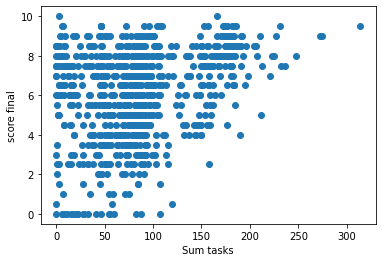

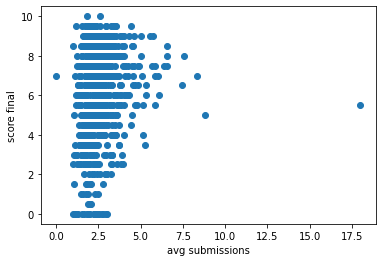

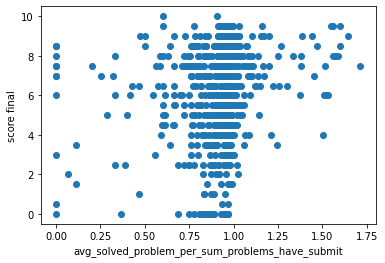

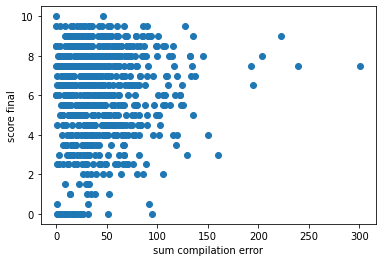

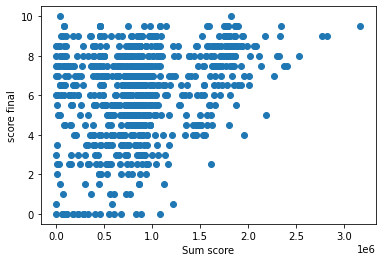

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x0[0], y_training)
plt.xlabel('Sum tasks')
plt.ylabel('score final')
plt.show()
plt.scatter(x0[1], y_training)
plt.xlabel('avg submissions')
plt.ylabel('score final')
plt.show()
plt.scatter(x0[2], y_training)
plt.xlabel('avg_solved_problem_per_sum_problems_have_submit')
plt.ylabel('score final')
plt.show()
plt.scatter(x0[3], y_training)
plt.xlabel('sum compilation error')
plt.ylabel('score final')
plt.show()
plt.scatter(x0[4], y_training)
plt.xlabel('Sum score')
plt.ylabel('score final')
plt.show()

**4.2.6. Xử lý số liệu X để phù hợp với hàm train của thư viện**

In [ ]:
import numpy as np 

# Building Xbar training
one = np.ones((X_training.shape[0], 1))
Xbar_training = np.concatenate((one, X_training), axis = 1)
print('Xbar_training: \n', Xbar_training[0:10])

Xbar_training: 
 [[1.000000e+00 7.200000e+01 2.129900e+00 9.231000e-01 3.300000e+01
  7.502990e+05]
 [1.000000e+00 3.000000e+00 2.600000e+00 6.000000e-01 0.000000e+00
  3.900000e+04]
 [1.000000e+00 7.200000e+01 2.487500e+00 9.000000e-01 2.800000e+01
  7.627600e+05]
 [1.000000e+00 8.100000e+01 2.595200e+00 9.643000e-01 1.600000e+01
  8.228880e+05]
 [1.000000e+00 1.450000e+02 1.966900e+00 9.864000e-01 5.100000e+01
  1.477000e+06]
 [1.000000e+00 9.300000e+01 3.058800e+00 9.118000e-01 6.200000e+01
  9.797120e+05]
 [1.000000e+00 2.070000e+02 3.088400e+00 1.083800e+00 1.120000e+02
  2.111388e+06]
 [1.000000e+00 6.100000e+01 1.549300e+00 8.592000e-01 5.000000e+00
  6.368880e+05]
 [1.000000e+00 1.910000e+02 1.670100e+00 1.055200e+00 3.400000e+01
  1.925142e+06]
 [1.000000e+00 1.480000e+02 2.817600e+00 1.510200e+00 1.180000e+02
  1.541357e+06]]


In [ ]:
# Building Xbar testing
one = np.ones((X_testing.shape[0], 1))
Xbar_testing = np.concatenate((one, X_testing), axis = 1)
print('Xbar_testing: \n', Xbar_testing[0:10])

Xbar_testing: 
 [[1.00000e+00 1.00000e+00 1.00000e+00 5.00000e-01 1.00000e+00 1.00000e+04]
 [1.00000e+00 3.70000e+01 1.42110e+00 9.02400e-01 6.00000e+00 3.70000e+05]
 [1.00000e+00 3.00000e+00 1.20000e+00 6.00000e-01 2.00000e+00 3.00000e+04]
 [1.00000e+00 8.50000e+01 1.47730e+00 9.65900e-01 2.50000e+01 8.50000e+05]
 [1.00000e+00 0.00000e+00 2.50000e+00 0.00000e+00 0.00000e+00 9.20900e+03]
 [1.00000e+00 9.00000e+00 4.16670e+00 5.00000e-01 7.00000e+00 1.00316e+05]
 [1.00000e+00 6.00000e+00 3.14290e+00 8.57100e-01 2.00000e+00 6.80000e+04]
 [1.00000e+00 4.50000e+01 1.94230e+00 9.00000e-01 2.50000e+01 4.58666e+05]
 [1.00000e+00 1.20000e+01 1.08330e+00 1.00000e+00 1.00000e+00 1.20000e+05]
 [1.00000e+00 3.00000e+00 4.33330e+00 1.00000e+00 0.00000e+00 3.00000e+04]]


**4.2.7. Thử train và predict không sử dụng thư viện**

In [ ]:
# Calculating weights of the fitting line 
A = np.dot(Xbar_training.T, Xbar_training)
print('A: ', A)
b = np.dot(Xbar_training.T, y_training)
print('b: ', b)
w = np.dot(np.linalg.pinv(A), b)
print('w: ', w)


A:  [[8.06000000e+02 6.98660000e+04 2.09088620e+03 7.40162900e+02
  3.44470000e+04 7.20117300e+08]
 [6.98660000e+04 8.30692400e+06 1.78743931e+05 6.93338972e+04
  3.72107100e+06 8.53451886e+10]
 [2.09088620e+03 1.78743931e+05 6.41883955e+03 1.90321039e+03
  1.01982557e+05 1.84408711e+09]
 [7.40162900e+02 6.93338972e+04 1.90321039e+03 7.12322013e+02
  3.30680088e+04 7.13135634e+08]
 [3.44470000e+04 3.72107100e+06 1.01982557e+05 3.30680088e+04
  2.37154300e+06 3.83147103e+10]
 [7.20117300e+08 8.53451886e+10 1.84408711e+09 7.13135634e+08
  3.83147103e+10 8.77456071e+14]]
b:  [4.9750000e+03 4.6059750e+05 1.3209408e+04 4.6321760e+03 2.1672050e+05
 4.7489290e+09]
w:  [ 3.39568652e+00 -7.40297351e-02  6.20836202e-01  2.63607153e-01
 -2.15960782e-02  9.24980995e-06]


In [ ]:
# Hàm dự đoán
def predict(x_testing, w):
  y = x_testing * np.array(w).T
  return y

In [ ]:
# Hàm testing
def testing(arr_data_testing, w):
  arr_y = []
  for i in range(len(arr_data_testing)):
    arr_y.append(predict(arr_data_testing[i], w))
  return arr_y

In [ ]:
arr_y = testing(Xbar, w)
print(arr_y)

In [ ]:
# Dự đoán thử 1 bộ dữ liệu bất kỳ rồi đưa ra kết quả
print(Xbar[1])
print(w.reshape(-1, 1))
y = Xbar[0].dot(w.reshape(-1, 1))
print(y)

[1.0e+00 3.0e+00 2.6e+00 6.0e-01 0.0e+00 3.9e+04]
[[ 3.39568652e+00]
 [-7.40297351e-02]
 [ 6.20836202e-01]
 [ 2.63607153e-01]
 [-2.15960782e-02]
 [ 9.24980995e-06]]
[5.85865295]


**4.2.8. Train và test dựa trên thư viện có sẵn**

In [ ]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar_training, y_training)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [ 3.39568646e+00 -7.40297360e-02  6.20836207e-01  2.63607199e-01
 -2.15960783e-02  9.24981003e-06]
Solution found by (5):  [ 3.39568652e+00 -7.40297351e-02  6.20836202e-01  2.63607153e-01
 -2.15960782e-02  9.24980995e-06]


In [ ]:
# Dự đoán thử 1 bộ dữ liệu bất kỳ rồi đưa ra kết quả
regr.predict(np.array([Xbar_training[19]]))

array([5.26842539])

In [ ]:
# Show bộ dự liệu đã dự đoán
print(np.array([Xbar_training[19]]))

[[1.00000e+00 2.10000e+01 2.20000e+00 8.40000e-01 1.30000e+01 2.29285e+05]]


In [ ]:
# Tính accuracy
regr.score(Xbar_training, y_training)

0.18654757084300244

**4.2.9. Dự đoán điểm thi cuối kỳ dựa trên bộ X_training**

In [ ]:
regr.predict(Xbar_training[0:10])

array([5.85865295, 5.3066783 , 6.29781693, 6.53068882, 6.70308905,
       6.37348489, 7.38579628, 5.85133803, 7.64395488, 6.29557543])

In [ ]:
# Hàm làm tròn điểm số
import numpy as np
def x_round(x):
    x = np.round(x*2)/2
    return x

In [ ]:
# Lưu predict results X_traning vào csv
from pandas import DataFrame
# Lấy dự liệu từ file data_training.csv
import pandas as pd
import numpy as np
df_training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_training.csv')
data_training_set = {
    'user_id':df_training['user_id'],
    'sum_tasks':df_training['sum_tasks'],
    'avg_submissions':df_training['avg_submissions'],
    'avg_solved_problem_per_sum_problems_have_submit':df_training['avg_solved_problem_per_sum_problems_have_submit'],
    'sum_compilation_error':df_training['sum_compilation_error'],
    'sum_score':df_training['sum_score'],
    'CK_score':df_training['CK_score'],
    'Predict_CK_score':x_round(regr.predict(Xbar_training))
}
df = DataFrame(data_training_set, columns= ['user_id', 'sum_tasks', 'avg_solved_problem_per_sum_problems_have_submit', 'avg_submissions', 'sum_compilation_error', 'sum_score', 'CK_score', 'Predict_CK_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/predict_X_training.csv', index = None, header=True)

In [ ]:
df.head(20)

,user_id,sum_tasks,avg_solved_problem_per_sum_problems_have_submit,avg_submissions,sum_compilation_error,sum_score,CK_score,Predict_CK_score
0,24.0,72.0,0.9231,2.1299,33.0,750299.0,9.5,6.0
1,27.0,3.0,0.6000,2.6000,0.0,39000.0,10.0,5.5
2,29.0,72.0,0.9000,2.4875,28.0,762760.0,8.5,6.5
3,34.0,81.0,0.9643,2.5952,16.0,822888.0,6.5,6.5
4,35.0,145.0,0.9864,1.9669,51.0,1477000.0,4.5,6.5
5,37.0,93.0,0.9118,3.0588,62.0,979712.0,7.5,6.5
6,40.0,207.0,1.0838,3.0884,112.0,2111388.0,8.0,7.5
7,41.0,61.0,0.8592,1.5493,5.0,636888.0,8.0,6.0
8,42.0,191.0,1.0552,1.6701,34.0,1925142.0,7.5,7.5
9,43.0,148.0,1.5102,2.8176,118.0,1541357.0,6.0,6.5


**4.2.10. Dự đoán điểm thi cuối kỳ dựa trên bộ X_testing**

In [ ]:
regr.predict(Xbar_testing[0:10])

array([4.14519856, 5.06958895, 4.31106717, 5.597375  , 5.03295848,
       6.22479206, 5.71446682, 5.2101164 , 4.53186982, 6.40496829])

In [ ]:
# Lưu predict results X_testing vào csv
from pandas import DataFrame
# Lấy dự liệu từ file data_training.csv
import pandas as pd
import numpy as np
df_Xtesting = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_testing.csv')
data_training_set = {
    'user_id':df_Xtesting['user_id'],
    'sum_tasks':df_Xtesting['sum_tasks'],
    'avg_submissions':df_Xtesting['avg_submissions'],
    'avg_solved_problem_per_sum_problems_have_submit':df_Xtesting['avg_solved_problem_per_sum_problems_have_submit'],
    'sum_compilation_error':df_Xtesting['sum_compilation_error'],
    'sum_score':df_Xtesting['sum_score'],
    'Predict_CK_score':x_round(regr.predict(Xbar_testing))
}
df = DataFrame(data_training_set, columns= ['user_id', 'sum_tasks', 'avg_solved_problem_per_sum_problems_have_submit', 'avg_submissions', 'sum_compilation_error', 'sum_score', 'Predict_CK_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/predict_X_testing.csv', index = None, header=True)

In [ ]:
df.head(20)

,user_id,sum_tasks,avg_solved_problem_per_sum_problems_have_submit,avg_submissions,sum_compilation_error,sum_score,Predict_CK_score
0,1.0,1.0,0.5000,1.0000,1.0,10000.0,4.0
1,4.0,37.0,0.9024,1.4211,6.0,370000.0,5.0
2,5.0,3.0,0.6000,1.2000,2.0,30000.0,4.5
3,6.0,85.0,0.9659,1.4773,25.0,850000.0,5.5
4,7.0,0.0,0.0000,2.5000,0.0,9209.0,5.0
5,11.0,9.0,0.5000,4.1667,7.0,100316.0,6.0
6,14.0,6.0,0.8571,3.1429,2.0,68000.0,5.5
7,15.0,45.0,0.9000,1.9423,25.0,458666.0,5.0
8,20.0,12.0,1.0000,1.0833,1.0,120000.0,4.5
9,31.0,3.0,1.0000,4.3333,0.0,30000.0,6.5
